# Hate Crime Rates
### By Vishnu Sivaprasad, Harrison Lanier, Josiah Glyshaw, and Anthony Hampton

In [2]:
from datascience import *
import numpy as np

%matplotlib inline

In [3]:
hateCrimes = Table.read_table('hate_crimes.csv')

hateCrimes = hateCrimes.sort('avg_hatecrimes_per_100k_fbi',descending = True)
#we aren't going to use this crime rate, so we are going to drop it to prevent conufsion
hateCrimes = hateCrimes.drop('hate_crimes_per_100k_splc') 
hateCrimes = hateCrimes.exclude(0) #have to remove Hawaii because it has no value for hate crime rates
hateCrimes.show(10)

state,median_household_income,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,gini_index,share_non_white,share_voters_voted_trump,avg_hatecrimes_per_100k_fbi
District of Columbia,68277,0.067,1,0.871,0.11,0.04,0.532,0.63,0.04,10.9535
Massachusetts,63151,0.046,0.97,0.89,0.09,0.08,0.475,0.27,0.34,4.8019
North Dakota,60730,0.028,0.5,0.901,0.03,0.09,0.433,0.15,0.64,4.74107
New Jersey,65243,0.056,1,0.874,0.11,0.07,0.464,0.44,0.42,4.4132
Kentucky,42786,0.05,0.56,0.817,0.03,0.17,0.466,0.15,0.63,4.20789
Washington,59068,0.052,0.86,0.897,0.08,0.09,0.441,0.31,0.38,3.81774
Connecticut,70161,0.052,0.94,0.886,0.06,0.06,0.486,0.3,0.41,3.7727
Minnesota,67244,0.038,0.75,0.915,0.05,0.05,0.44,0.18,0.45,3.61241
Arizona,49254,0.063,0.9,0.842,0.1,0.09,0.455,0.49,0.5,3.41393
Oregon,58875,0.062,0.87,0.891,0.07,0.1,0.449,0.26,0.41,3.39489


In [4]:
#Highest Hates Crimes
hateCrimes.sort('avg_hatecrimes_per_100k_fbi',descending = True).take(0).select('state','avg_hatecrimes_per_100k_fbi')

state,avg_hatecrimes_per_100k_fbi
District of Columbia,10.9535


In [5]:
#Lowest Hate Crimes
hateCrimes.sort('avg_hatecrimes_per_100k_fbi',descending = False).take(0).select('state','avg_hatecrimes_per_100k_fbi')

state,avg_hatecrimes_per_100k_fbi
Wyoming,0.266941


# Dictrict of Columbia has the higest hate crimes (10.95)
# Wyoming has the lowest hate crimes (0.266)

In [6]:
def standard_units(data):
    mean = np.mean(data)
    std = np.std(data)
    
    data = (data-mean)/std
    return data

def correlation(x, y):
    product = standard_units(x) * standard_units(y)
    coefficient = np.mean(product)
    return coefficient

def parameter_estimates(x,y):   
    r = correlation(x,y)
    slope = r * (np.std(y)/np.std(x))
    intercept = np.mean(y) - slope * np.mean(x)
    
    return make_array(r, slope, intercept)

#takes in a column and returns the correlation, slope, and intercept compared to the hateCrimes crime rates
def hateCrimePredictor(value, column):        
    parameters = parameter_estimates(column, hateCrimes.column('avg_hatecrimes_per_100k_fbi'))
    
    slope = parameters[1]
    intercept = parameters[2]
    
    return slope * value + intercept


In [7]:
correlations = []

for i in range(1,hateCrimes.num_columns):
    correlations.append((  hateCrimes.labels[i], correlation(hateCrimes.column('avg_hatecrimes_per_100k_fbi'),hateCrimes.column(i))    ))

correlations    

[('median_household_income', 0.31824643796542007),
 ('share_unemployed_seasonal', 0.07393579883302097),
 ('share_population_in_metro_areas', 0.2098265797987205),
 ('share_population_with_high_school_degree', 0.16414763589276832),
 ('share_non_citizen', nan),
 ('share_white_poverty', -0.2600944238414132),
 ('gini_index', 0.42127186290589186),
 ('share_non_white', 0.08352525576195496),
 ('share_voters_voted_trump', -0.5045315976517885),
 ('avg_hatecrimes_per_100k_fbi', 0.9999999999999999)]

# Strongest correlations are: 
### share_voters_voted_trump (-0.50) 
### gini_index (0.42)
### median_household_income (0.32)
# It appears to be that for higher values of Trump voters, there are less hate crimes

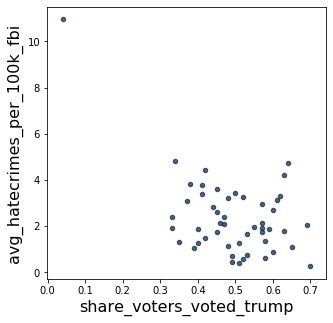

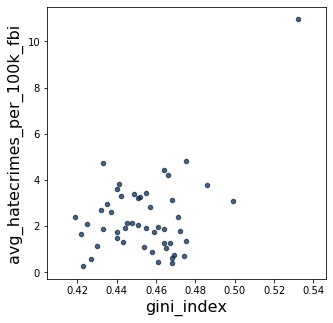

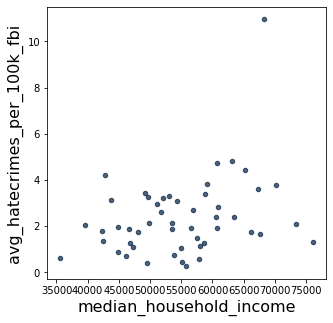

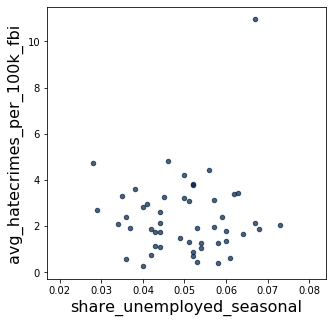

In [8]:
hateCrimes.scatter('share_voters_voted_trump','avg_hatecrimes_per_100k_fbi')
hateCrimes.scatter('gini_index', 'avg_hatecrimes_per_100k_fbi')
hateCrimes.scatter('median_household_income', 'avg_hatecrimes_per_100k_fbi')
hateCrimes.scatter('share_unemployed_seasonal', 'avg_hatecrimes_per_100k_fbi')

## Now we can predict the hate crime rates based off of certain properities of states

In [25]:
#hateCrimePredictor()
Arizona = hateCrimes.take(8)
ArizonaVoters = Arizona.column('share_voters_voted_trump')
print(hateCrimePredictor(ArizonaVoters, hateCrimes.column('share_voters_voted_trump')))
print(hateCrimes.where('state','Kentucky').column('avg_hatecrimes_per_100k_fbi'))

[2.32167894]
[4.20788962]


# We can predict the hate crime rates to a certain degree, but the data is not extremely correlated. Regardless of your political values hate crimes can still be commited any number of people.

In [13]:
predictedValues = []
for value in hateCrimes.column('share_voters_voted_trump'):
    predictedValues.append(hateCrimePredictor(value,hateCrimes.column('share_voters_voted_trump')))
    
crimeTrumpPredictions = hateCrimes.select('share_voters_voted_trump','avg_hatecrimes_per_100k_fbi').with_column('Predicted Crimes',predictedValues)
crimeTrumpPredictions = crimeTrumpPredictions.relabeled('share_voters_voted_trump', 'Trump Voter Rate')
crimeTrumpPredictions = crimeTrumpPredictions.relabeled('avg_hatecrimes_per_100k_fbi', 'Actual Crimes')
crimeTrumpPredictions.show(10)

Trump Voter Rate,Actual Crimes,Predicted Crimes
0.04,10.9535,5.72969
0.34,4.8019,3.50707
0.64,4.74107,1.28446
0.42,4.4132,2.91438
0.63,4.20789,1.35855
0.38,3.81774,3.21073
0.41,3.7727,2.98846
0.45,3.61241,2.69211
0.5,3.41393,2.32168
0.41,3.39489,2.98846


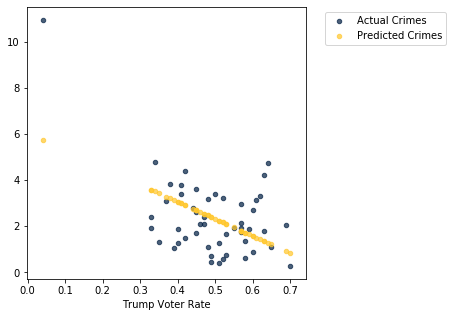

In [14]:
crimeTrumpPredictions.scatter('Trump Voter Rate')

In [172]:
predictedValues2 = []
for value in hateCrimes.column('median_household_income'):
    predictedValues2.append(hateCrimePredictor(value,hateCrimes.column('median_household_income')))
    
crimeHousePredictions = hateCrimes.select('median_household_income','avg_hatecrimes_per_100k_fbi').with_column('Predicted Crimes',predictedValues2)
crimeHousePredictions = crimeHousePredictions.relabeled('median_household_income', 'Median House Income')
crimeHousePredictions = crimeHousePredictions.relabeled('avg_hatecrimes_per_100k_fbi', 'Actual Crimes')
crimeHousePredictions.show(10)

Median House Income,Actual Crimes,Predicted Crimes
68277,10.9535,3.17728
63151,4.8019,2.86693
60730,4.74107,2.72036
65243,4.4132,2.99359
42786,4.20789,1.63398
59068,3.81774,2.61974
70161,3.7727,3.29134
67244,3.61241,3.11474
49254,3.41393,2.02557
58875,3.39489,2.60805


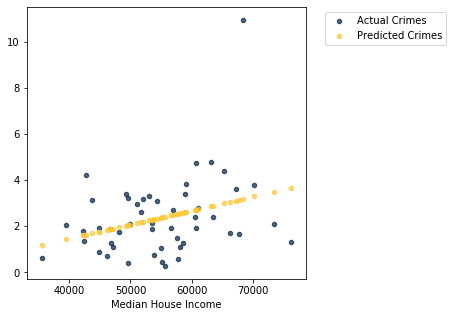

In [174]:
crimeHousePredictions.scatter('Median House Income')